In [200]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [201]:
data=pd.read_csv("wine.xls",names=['Cultivator','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoids','Proanth','Color','Hue','Od','Proline'])

In [202]:
data.head()

,Cultivator,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,Od,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [203]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonFlavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [204]:
data.Cultivator.nunique()

3

In [205]:
data.Cultivator.unique()

array([1, 2, 3], dtype=int64)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator       178 non-null int64
Alcohol          178 non-null float64
Malic_acid       178 non-null float64
Ash              178 non-null float64
Acl              178 non-null float64
Mg               178 non-null int64
Phenols          178 non-null float64
Flavanoids       178 non-null float64
NonFlavanoids    178 non-null float64
Proanth          178 non-null float64
Color            178 non-null float64
Hue              178 non-null float64
Od               178 non-null float64
Proline          178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [207]:
data.isnull().sum()

Cultivator       0
Alcohol          0
Malic_acid       0
Ash              0
Acl              0
Mg               0
Phenols          0
Flavanoids       0
NonFlavanoids    0
Proanth          0
Color            0
Hue              0
Od               0
Proline          0
dtype: int64

In [208]:
data.Proline.nunique()

121

In [209]:
data.shape        # by looking at the columns i.e 14, the rows should greater than (no of columns)^2

(178, 14)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


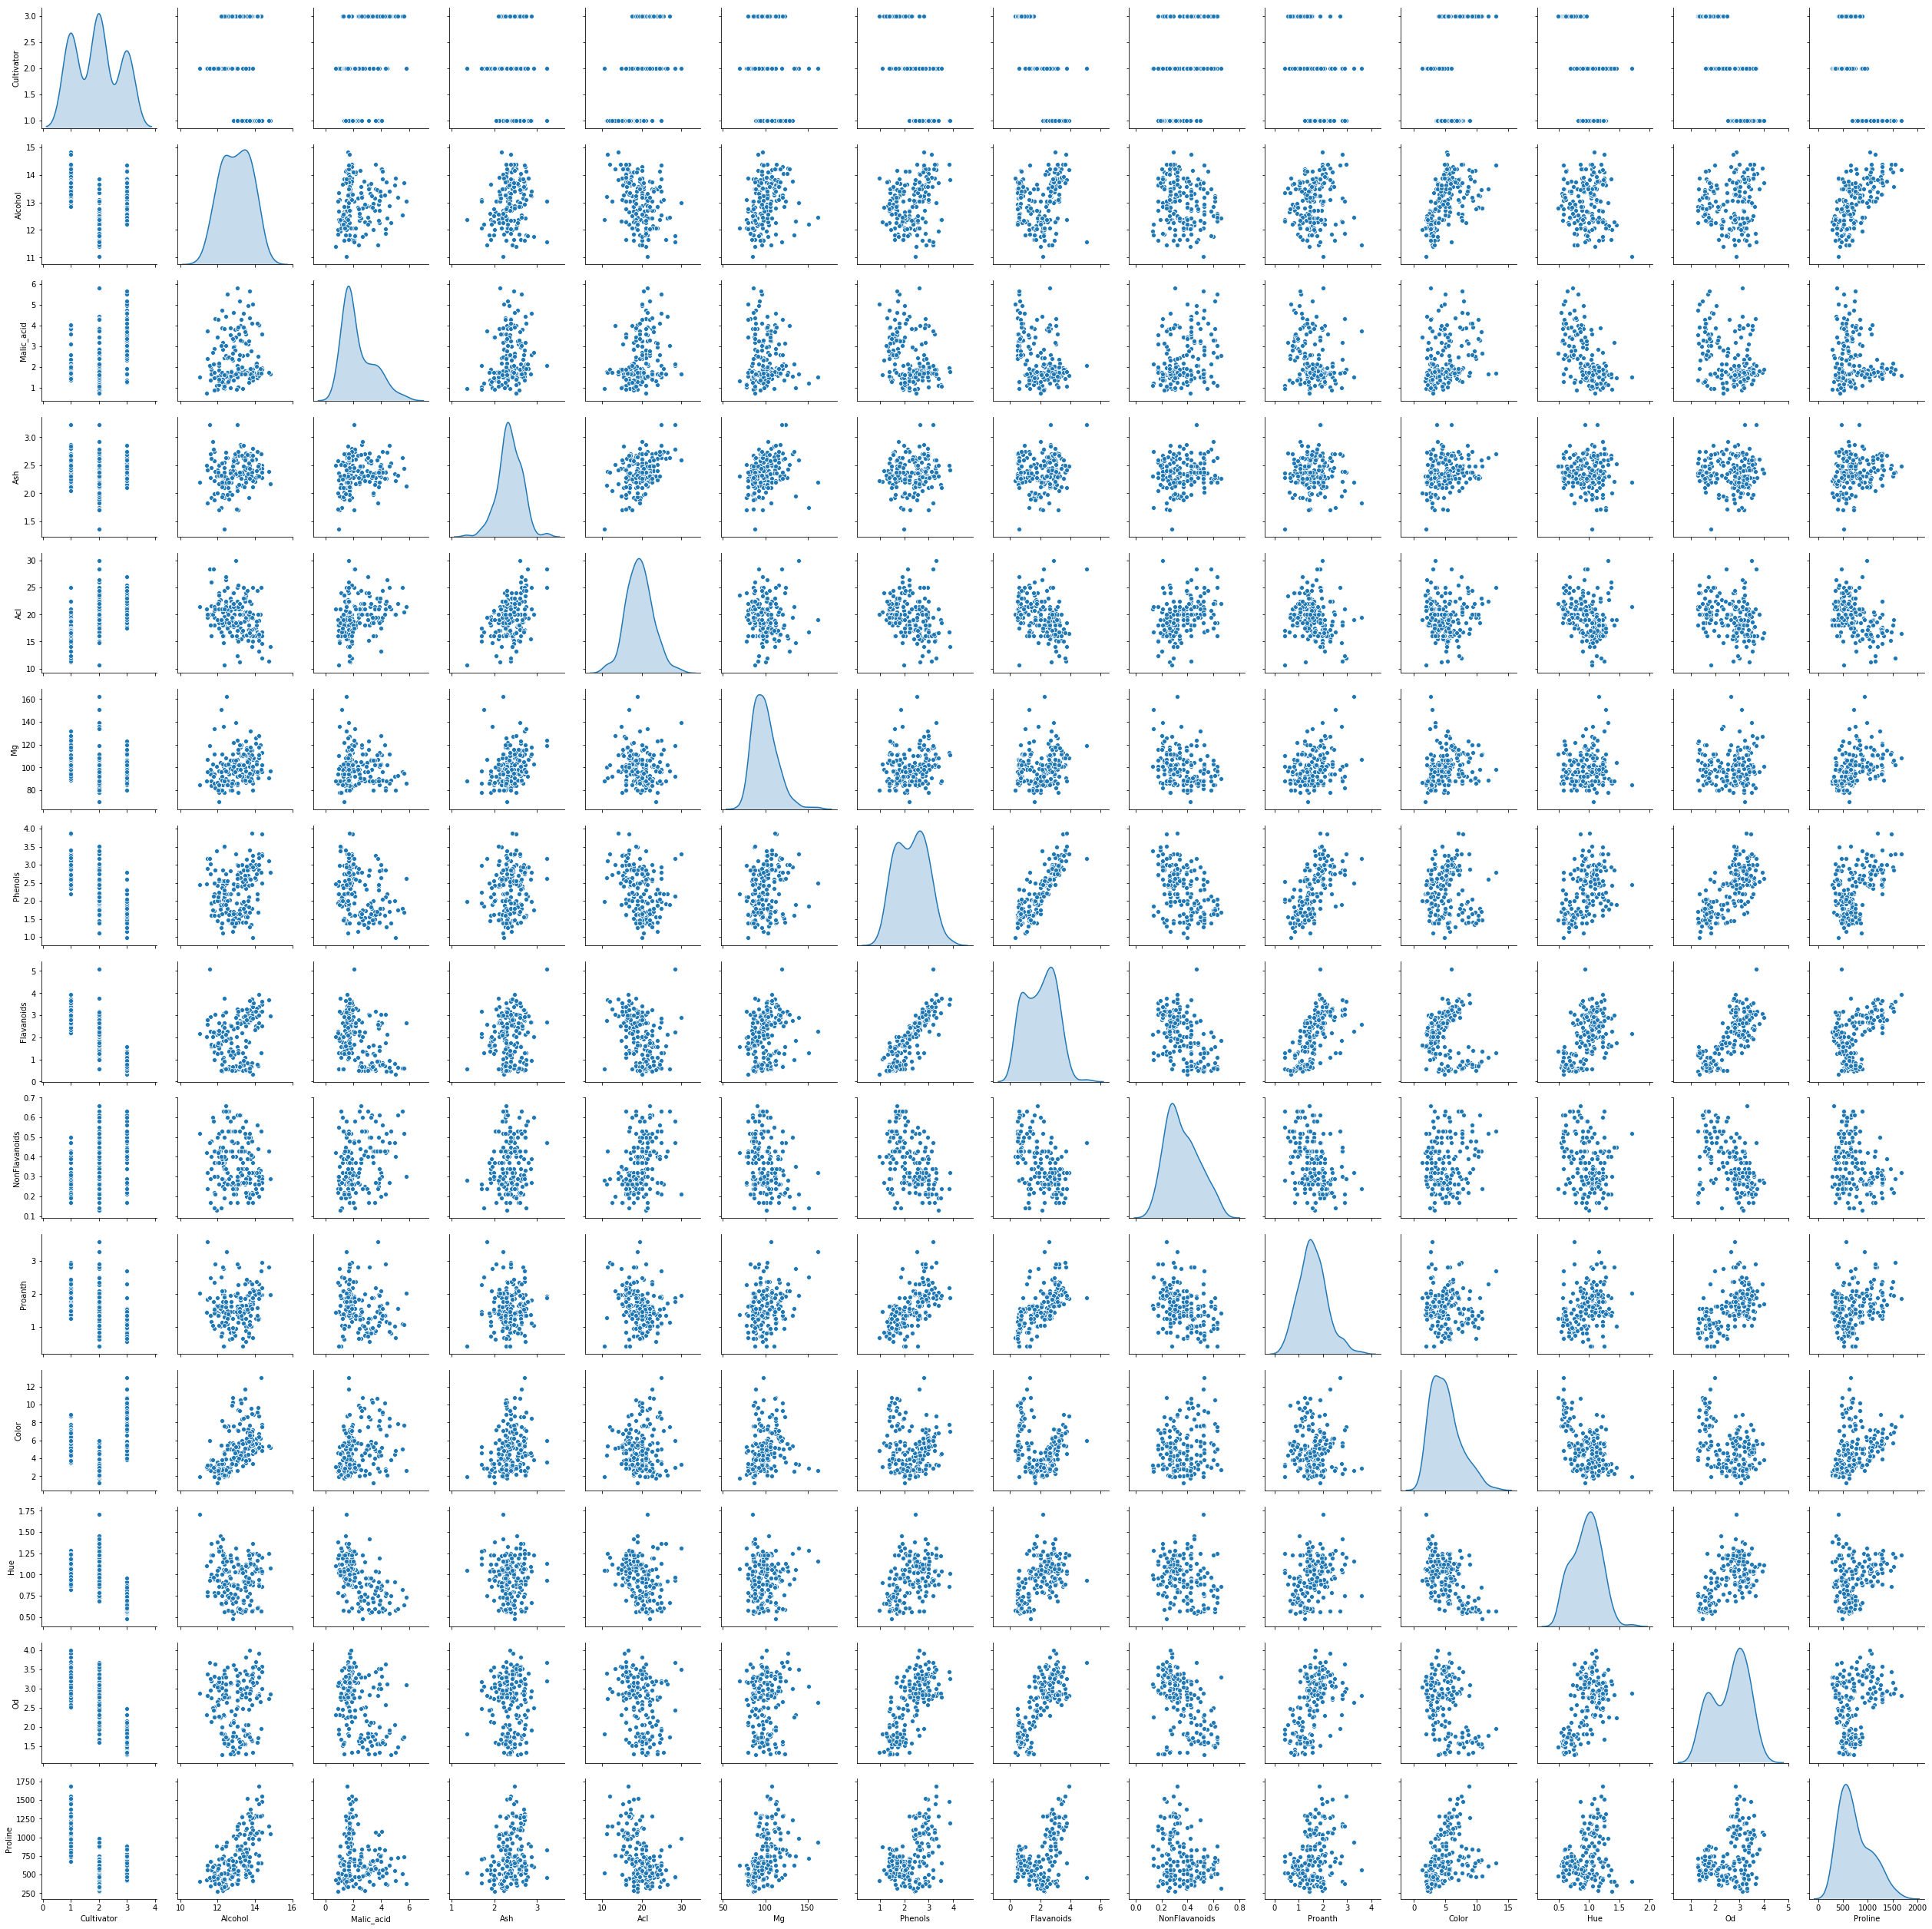

In [210]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [211]:
data.corr()

,Cultivator,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,Od,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonFlavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [212]:
y=data["Cultivator"]
x=data.drop(columns="Cultivator")

In [213]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2)
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
ypred=model.predict(x_test)


In [214]:
# Perform Grid Search Method to find the optimal max_depth Size

In [215]:
params={'max_depth':np.arange(1,10)}
gs=GridSearchCV(model,params,cv=3)
gs.fit(x,y)
gs.best_params_

{'max_depth': 8}

In [216]:
# another method
# params={'max_depth':np.arange(1,25)}
# gs=GridSearchCV(model,params)
# cv={'cv':np.arange(2,10)}    # the folds will start from 2
# gs1=GridSearchCV(estimator=gs,param_grid=cv)
# gs1.fit(x,y)
# gs1.best_params_

In [217]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2)
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [218]:
acc=metrics.accuracy_score(y_test,ypred)
acc

0.9074074074074074

In [219]:
pd.crosstab(y_test,ypred)

col_0,1,2,3
Cultivator,,,
1,19,1,0
2,0,20,0
3,0,4,10


In [220]:
cr=metrics.classification_report(y_test,ypred)
print(cr)

             precision    recall  f1-score   support

          1       1.00      0.95      0.97        20
          2       0.80      1.00      0.89        20
          3       1.00      0.71      0.83        14

avg / total       0.93      0.91      0.91        54



In [221]:
print(pd.DataFrame(model.feature_importances_,columns=["IMP"],index=x_train.columns)) 

                    IMP
Alcohol        0.000000
Malic_acid     0.024662
Ash            0.000000
Acl            0.010313
Mg             0.000000
Phenols        0.000000
Flavanoids     0.433706
NonFlavanoids  0.000000
Proanth        0.000000
Color          0.237675
Hue            0.000000
Od             0.000000
Proline        0.293643
